In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


### 2. 导入数据集，探索数据


In [2]:
data = load_breast_cancer()
 
data


{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
data.target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [4]:
data.data.shape


(569, 30)

### 可以看到，乳腺癌数据集有569条记录，30个特征，单看维度虽然不算太高，但是样本量非常少。过拟合的情况可能存在。


### 3. 进行一次简单的建模，看看模型本身在数据集上的效果


In [5]:
rfc = RandomForestClassifier(n_estimators=100,random_state=90)
score_pre = cross_val_score(rfc,data.data,data.target,cv=10).mean()
 
score_pre
 
#这里可以看到，随机森林在乳腺癌数据上的表现本就还不错，在现实数据集上，基本上不可能什么都不调就看到95%以上的准确

0.9648809523809524

### 4. 随机森林调整的第一步：无论如何先来调n_estimators


0.9631265664160402 71


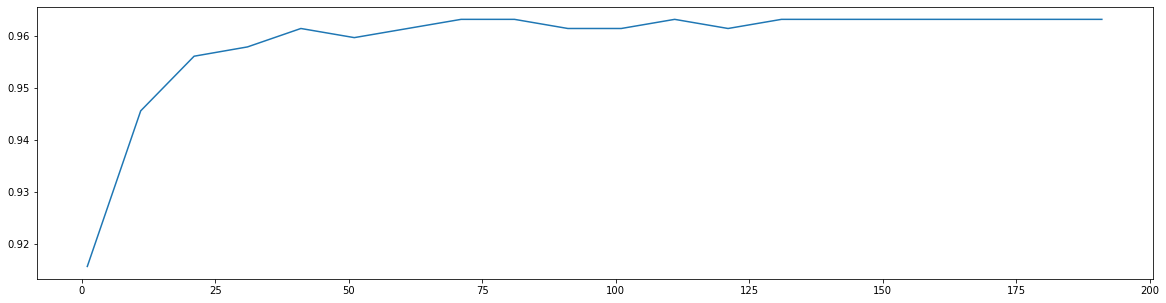

In [6]:
"""
在这里我们选择学习曲线，可以使用网格搜索吗？可以，但是只有学习曲线，才能看见趋势
我个人的倾向是，要看见n_estimators在什么取值开始变得平稳，是否一直推动模型整体准确率的上升等信息
第一次的学习曲线，可以先用来帮助我们划定范围，我们取每十个数作为一个阶段，来观察n_estimators的变化如何
引起模型整体准确率的变化
"""
 
#####【TIME WARNING: 30 seconds】#####
 
scorel = []
for i in range(0,200,10):#n_estimators每隔10个测试一次。
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                 random_state=90)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)#输出10次交叉验证中最大的均值，并输出索引。
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()


### 注意：上一步只是在10波动范围内找范围，下面在71上下找精确值。

### 5. 在确定好的范围内，进一步细化学习曲线


0.9666353383458647 73


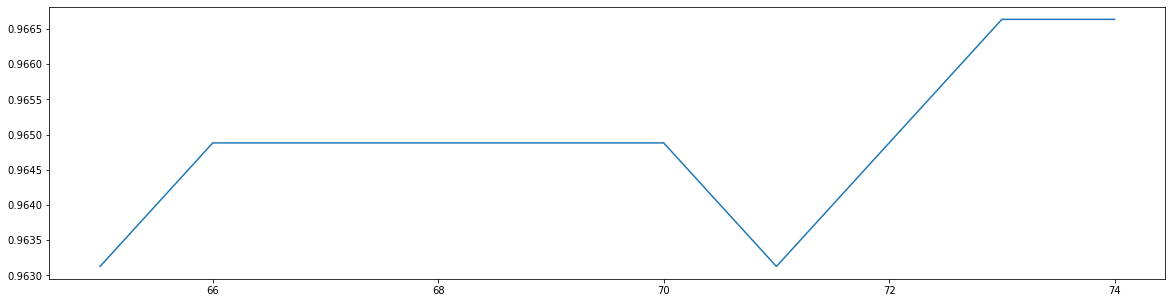

In [8]:
scorel = []
for i in range(65,75):
    rfc = RandomForestClassifier(n_estimators=i,
                                 n_jobs=-1,
                                 random_state=90)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)
print(max(scorel),([*range(65,75)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(65,75),scorel)
plt.show()


### 调整n_estimators的效果显著，模型的准确率立刻上升了0.005。接下来就进入网格搜索，我们将使用网格搜索对参数一个个进行调整。为什么我们不同时调整多个参数呢？原因有两个：1）同时调整多个参数会运行非常缓慢。2）同时调整多个参数，会让我们无法理解参数的组合是怎么得来的，所以即便网格搜索调出来的结果不好，我们也不知道从哪里去改。在这里，为了使用复杂度-泛化误差方法（方差-偏差方法），我们对参数进行一个个地调整。


In [ ]:
调整n_estimators的效果显著，模型的准确率立刻上升了0.005。接下来就进入网格搜索，我们将使用网格搜索对
参数一个个进行调整。为什么我们不同时调整多个参数呢？原因有两个：1）同时调整多个参数会运行非常缓慢，
在课堂上我们没有这么多的时间。2）同时调整多个参数，会让我们无法理解参数的组合是怎么得来的，所以即便
网格搜索调出来的结果不好，我们也不知道从哪里去改。在这里，为了使用复杂度-泛化误差方法（方差-偏差方
 法），我们对参数进行一个个地调整。


### 6. 为网格搜索做准备，书写网格搜索的参数


In [ ]:
"""
有一些参数是没有参照的，很难说清一个范围，这种情况下我们使用学习曲线，看趋势
从曲线跑出的结果中选取一个更小的区间，再跑曲线param_grid = {'n_estimators':np.arange(0, 200, 10)}
 
param_grid = {'max_depth':np.arange(1, 20, 1)}
    
param_grid = {'max_leaf_nodes':np.arange(25,50,1)}
    对于大型数据集，可以尝试从1000来构建，先输入1000，每100个叶子一个区间，再逐渐缩小范围
 
有一些参数是可以找到一个范围的，或者说我们知道他们的取值和随着他们的取值，模型的整体准确率会如何变化，这
样的参数我们就可以直接跑网格搜索
param_grid = {'criterion':['gini', 'entropy']}
 
param_grid = {'min_samples_split':np.arange(2, 2+20, 1)}
 
param_grid = {'min_samples_leaf':np.arange(1, 1+10, 1)}
    
param_grid = {'max_features':np.arange(5,30,1)} 
 
"""



### 7. 开始按照参数对模型整体准确率的影响程度进行调参，首先调整max_depth


In [9]:
#调整max_depth
 
param_grid = {'max_depth':np.arange(1, 20, 1)}
 
#   一般根据数据的大小来进行一个试探，乳腺癌数据很小，所以可以采用1~10，或者1~20这样的试探
#   但对于像digit recognition那样的大型数据来说，我们应该尝试30~50层深度（或许还不足够
#   更应该画出学习曲线，来观察深度对模型的影响
 
rfc = RandomForestClassifier(n_estimators=73
                             ,random_state=90#这个值随便写
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
 
GS.best_params_
 
GS.best_score_

0.9666353383458647

### 模型已经不能进一步上升了！

In [ ]:
最后最佳的结果：


In [10]:
rfc = RandomForestClassifier(n_estimators=39,random_state=90)
score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
score
 
score - score_pre


-0.007017543859649145